## Import Modules

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630125 sha256=b2a8043a47f725f39ef97088977f54aae5e1821848125a5ea87368759b9a84f8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
# import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## Data Import

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing data
reviews = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/California_reviews.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
users = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/CA_users.csv', usecols= ['user_id', 'is_elite'])

## Elite Reviews Only

In [ ]:
elite_reviews_df = reviews.merge(users, how='left', on=['user_id'], indicator=True)
elite_reviews_df.shape

(239065, 6)

In [ ]:
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(48367, 6)

In [ ]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(elite_reviews_df[['user_id', 'business_id', 'stars']], reader)

## User Based

### 3 Split

##### KNNBasic

In [ ]:
KNNBasic_algorithms_UserBased_3Split=[]
KNNBasic_RMSE_scores_UserBased_3Split=[]

In [ ]:
## Fit the model with 3 splits
kf = KFold(n_splits=3)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))



Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0439
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0253


In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0914
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0783
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0892


In [ ]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0267
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0291
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0366


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0255
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0320
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0400


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0427
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0284
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0185


In [ ]:
KNNBasic_algorithms_UserBased_3Split

['Msd', 'Pearson_baseline', 'Cosine', 'Cosine_sgd', 'Msd_Sgd']

In [ ]:
KNNBasic_RMSE_scores_UserBased_3Split

[1.0253237020861956,
 1.078268976489873,
 1.026683716818725,
 1.0254817193527948,
 1.0184786877643763]

##### KNNwithMeans

In [ ]:
KNNwithMeans_RMSE_scores_UserBased_3Split=[]
KNNwithMeans_algorithms_UserBased_3Split=[]

In [ ]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Cosine')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0491
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0528
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531


In [ ]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1170
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0950
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1081


In [ ]:
KNNwithMeans_RMSE_scores_UserBased_3Split

[1.0490781000732603, 1.0950225898555264]

##### KNNwithBaseline

In [ ]:
KNNwithBaseline_algorithms_UserBased_3Split=[]
KNNwithBaseline_RMSE_scores_UserBased_3Split=[]

In [ ]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0471
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0342
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0466


In [ ]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Cosine')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0395
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0305
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0418


In [ ]:
KNNwithBaseline_algorithms_UserBased_3Split

['Pearson_baseline', 'Cosine']

In [ ]:
KNNwithBaseline_RMSE_scores_UserBased_3Split

[1.0341636166454082, 1.0305483085317848]

### 5 Split

##### KNNBasic

In [ ]:
KNNBasic_algorithms_UserBased_5Split=[]
KNNBasic_RMSE_scores_UserBased_5Split=[]


In [ ]:
## Fit the model with 5 splits

kf = KFold(n_splits=5)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0144
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0187
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0255
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0105
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0133


In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0628
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0940
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0852
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0738
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0876


In [ ]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0351
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0197
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0055
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0124
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0149


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0268
RMSE: 1.0268
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0128
RMSE: 1.0128
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0125
RMSE: 1.0125
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0314
RMSE: 1.0314
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0115
RMSE: 1.0115


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0063
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0151
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0263
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0237
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0071


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0622
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0616
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0675
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0614
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0497


In [ ]:
KNNBasic_algorithms_UserBased_5Split

['Msd',
 'Pearson_baseline',
 'Cosine',
 'Cosine_sgd',
 'Msd_Sgd',
 'pearson_baseline_sgd']

In [ ]:
KNNBasic_RMSE_scores_UserBased_5Split

[1.0105176321045968,
 1.062802432856198,
 1.0055380392449285,
 1.011536727220319,
 1.0062822069604902,
 1.0497339596107358]

##### KNNWithMeans

In [ ]:
KNNWithMeans_algorithms_UserBased_5Split=[]
KNNWithMeans_RMSE_scores_UserBased_5Split=[]

In [ ]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Cosine')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0389
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0382
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0347
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0341
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0407


In [ ]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0824
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0994
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1036
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1039
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0778


In [ ]:
KNNWithMeans_algorithms_UserBased_5Split

['Cosine', 'Pearson_baseline']

In [ ]:
KNNWithMeans_RMSE_scores_UserBased_5Split

[1.034112742933713, 1.0777645400356464]

##### KNNBaseline

In [ ]:
KNNBaseline_algorithms_UserBased_5Split=[]
KNNBaseline_RMSE_scores_UserBased_5Split=[]

In [ ]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0414
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0408
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0325
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0555
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0404


In [ ]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Cosine')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0321
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0555
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0311
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0307
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0311


In [ ]:
KNNBaseline_algorithms_UserBased_5Split

['Pearson_baseline', 'Cosine']

In [ ]:
KNNBaseline_RMSE_scores_UserBased_5Split

[1.0324702817068105, 1.0306848138024807]

## Item Based

### 3-Split

##### KNNBasic

In [ ]:
KNNBasic_algorithms_ItemBased_3Split=[]
KNNBasic_RMSE_scores_ItemBased_3Split=[]

In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0917
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0951
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0888


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0628
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0652
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0674


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0611
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0645
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0632


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_basline_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0824
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0779
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0892


In [ ]:
KNNBasic_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_basline_sgd']

In [ ]:
KNNBasic_RMSE_scores_ItemBased_3Split

[1.0888060418164582,
 1.0628012513403418,
 1.0611140332238118,
 1.0779422156481462]

##### KNNWithmeans

In [ ]:
KNNWithMeans_algorithms_ItemBased_3Split=[]
KNNWithMeans_RMSE_scores_ItemBased_3Split=[]

In [ ]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0188
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0123
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0307


In [ ]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0504
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0464
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0338


In [ ]:
KNNWithMeans_algorithms_ItemBased_3Split

['cosine', 'pearson_baseline']

In [ ]:
KNNWithMeans_RMSE_scores_ItemBased_3Split

[1.0123240296578095, 1.0338321290309698]

##### KNNBaseline

In [ ]:
KNNBaseline_algorithms_ItemBased_3Split=[]
KNNBaseline_RMSE_scores_ItemBased_3Split=[]

In [ ]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
    
KNNBaseline_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0423
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0482
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531


In [ ]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_3Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0424
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0628
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0518


In [ ]:
KNNBaseline_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine']

In [ ]:
KNNBaseline_RMSE_scores_ItemBased_3Split

[1.042276933809923, 1.042433206270704]

### 5-Split

##### KNNBasic

In [ ]:
KNNBasic_algorithms_ItemBased_5Split=[]
KNNBasic_RMSE_scores_ItemBased_5Split=[]

In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0835
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0882
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0800
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0874


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0621
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0580
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0588
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0624
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0557


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0564
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0623
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0629
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0433
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0605


In [ ]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }

bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0862
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0708
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0753
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0561
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0771


In [ ]:
KNNBasic_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_baseline_sgd']

In [ ]:
KNNBasic_RMSE_scores_ItemBased_5Split

[1.0800136912876757, 1.0556874255798274, 1.043322349804553, 1.0561131908893635]

##### KNNWithMeans

In [ ]:
KNNWithMeans_algorithms_ItemBased_5Split=[]
KNNWithMeans_RMSE_scores_ItemBased_5Split=[]

In [ ]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0096
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0117
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0152
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0273
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0173


In [ ]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0329
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0466
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0376
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0373
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0469


In [ ]:
KNNWithMeans_algorithms_ItemBased_5Split

['cosine', 'pearson_baseline']

In [ ]:
KNNWithMeans_RMSE_scores_ItemBased_5Split

[1.009561695886219, 1.0328926353249033]

##### KNNBaseline

In [ ]:
KNNBaseline_algorithms_ItemBased_5Split=[]
KNNBaseline_RMSE_scores_ItemBased_5Split=[]

In [ ]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0449
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0543
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0439
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0556
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0524


In [ ]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0517
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0579
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0347
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0572
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0317


In [ ]:
KNNBaseline_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine']

In [ ]:
KNNBaseline_RMSE_scores_ItemBased_5Split

[1.043890755685553, 1.0316717767805392]

## Best Parameters using Grid Search

### Grid Search with KNNBasic

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNBasic
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Grid Search with KNNWithMeans

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNWithMeans
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Grid Search with KNNBaseline

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNBaseline
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

## KNN RMSE PLOTS

### KNN Basic (User Based)

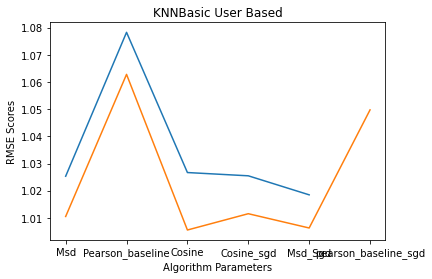

In [ ]:
import matplotlib.pyplot as plt
plt.plot(KNNBasic_algorithms_UserBased_3Split, KNNBasic_RMSE_scores_UserBased_3Split)
plt.plot(KNNBasic_algorithms_UserBased_5Split, KNNBasic_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBasic User Based")
plt.savefig('KNNBasic_User_Based.png')
plt.show()



### KNNBasic Item Based

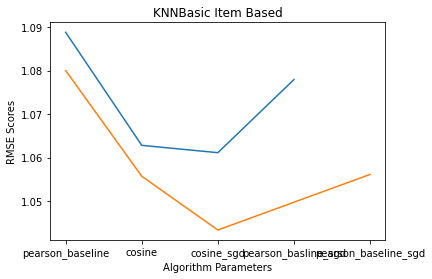

In [ ]:
plt.plot(KNNBasic_algorithms_ItemBased_3Split, KNNBasic_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBasic_algorithms_ItemBased_5Split, KNNBasic_RMSE_scores_ItemBased_5Split)

plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBasic Item Based")
plt.savefig('KNNBasic_Item_Based.png')
plt.show()


### KNNWithMeans UserBased

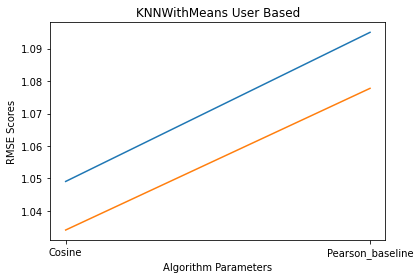

In [ ]:
plt.plot(KNNwithMeans_algorithms_UserBased_3Split, KNNwithMeans_RMSE_scores_UserBased_3Split)
plt.plot(KNNWithMeans_algorithms_UserBased_5Split, KNNWithMeans_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNWithMeans User Based")
plt.savefig('KNNWithMeans_User_Based.png')
plt.show()


### KNNWithMeans ItemBased

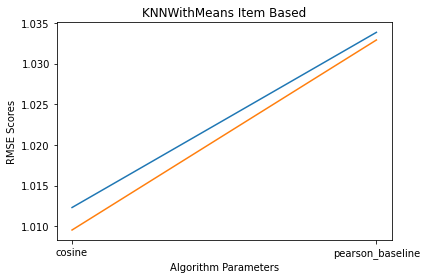

In [ ]:
plt.plot(KNNWithMeans_algorithms_ItemBased_3Split, KNNWithMeans_RMSE_scores_ItemBased_3Split)
plt.plot(KNNWithMeans_algorithms_ItemBased_5Split, KNNWithMeans_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNWithMeans Item Based")
plt.savefig('KNNWithMeans_Item_Based.png')
plt.show()


### KNNBaseline UserBased

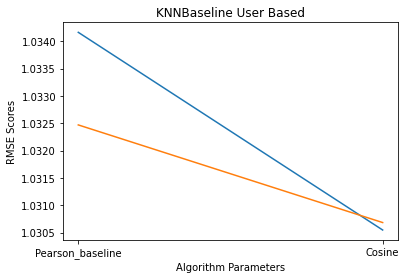

In [ ]:
plt.plot(KNNwithBaseline_algorithms_UserBased_3Split, KNNwithBaseline_RMSE_scores_UserBased_3Split)
plt.plot(KNNBaseline_algorithms_UserBased_5Split, KNNBaseline_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBaseline User Based")
plt.savefig('KNNBaseline_User_Based.png')
plt.show()


### KNNBaseline ItemBased

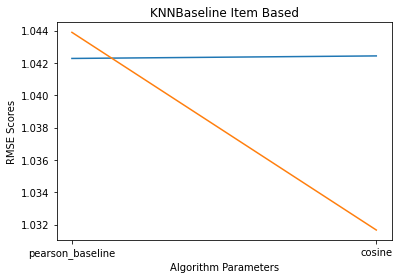

In [ ]:
plt.plot(KNNBaseline_algorithms_ItemBased_3Split, KNNBaseline_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBaseline_algorithms_ItemBased_5Split, KNNBaseline_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBaseline Item Based")
plt.savefig('KNNBaseline_Item_Based.png')
plt.show()


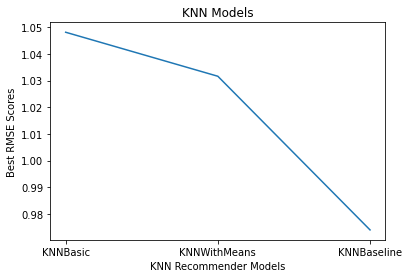

In [ ]:
algorithms=["KNNBasic","KNNWithMeans", "KNNBaseline"]
RMSE_Scores=[1.0481,1.0316,0.974]
plt.plot(algorithms,RMSE_Scores)
plt.ylabel('Best RMSE Scores')
plt.xlabel('KNN Recommender Models')
plt.title("KNN Models")
plt.savefig('KNN_Recommender_Models.png')
plt.show()

# Sentiment Based KNN

In [4]:
## Importing data
reviews = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/California_reviews.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
users = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/CA_users.csv', usecols= ['user_id', 'is_elite'])
sentiment_reviews = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/sentiment_reviews_CA.csv', usecols= ['review_id', 'sentiment'])

## Elite Reviews Only

In [5]:
intersected_df = reviews.merge(sentiment_reviews, how='left', on=['review_id'], indicator=True)

# intersected_df.loc[intersected_df['_merge'] == 'left_only', 'stars'] = 0


intersected_df.head(100)

sentiment_filtered_review_df = intersected_df.loc[intersected_df['_merge'] == 'both']
sentiment_filtered_review_df.head(5)

,review_id,user_id,business_id,stars,sentiment,_merge
2,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0.315000,both
4,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0.260518,both
11,bi6GaeWDGceGv62lXTIKQA,RgtbLaiU22zqaCk20HgbiQ,bjhCtlYHrkgA5Ku8l-rB3g,1.0,-0.241667,both
16,dpgq69tsI2f_GpRH71hQsA,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,0.284036,both
18,OYrtEEEu0qLiTdwlPm9egQ,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,0.295561,both


In [6]:
sentiment_filtered_review_df.shape

(18492, 6)

In [7]:
intersected_df.shape

(239065, 6)

In [8]:
elite_reviews_df = sentiment_filtered_review_df.merge(users, how='left', on=['user_id'])
elite_reviews_df.shape

(18492, 7)

In [9]:
elite_reviews_df.loc[elite_reviews_df['is_elite'] == True].shape

(18492, 7)

In [10]:
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(18492, 7)

In [11]:
len(elite_reviews_df.business_id.unique())

1330

In [12]:
len(elite_reviews_df.user_id.unique())

6895

In [13]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(elite_reviews_df[['user_id', 'business_id', 'stars']], reader)

## Best Parameters using Grid Search

### Grid Search with KNNBasic

In [14]:
from surprise.model_selection import GridSearchCV

In [15]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [17]:
from surprise import KNNBasic
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=10)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Streaming output truncated to the last 5000 lines.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


### Grid Search with KNNWithMeans

In [18]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [20]:
from surprise import KNNWithMeans
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Grid Search with KNNBaseline

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNBaseline
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Streaming output truncated to the last 5000 lines.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating bi

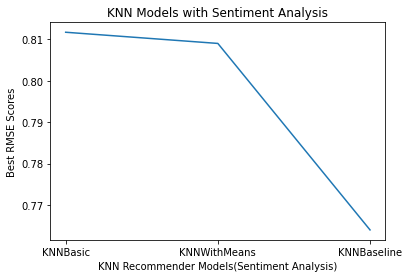

In [22]:
import matplotlib.pyplot as plt
algorithms=["KNNBasic","KNNWithMeans", "KNNBaseline"]
RMSE_Scores=[0.8117,0.809,0.764]
plt.plot(algorithms,RMSE_Scores)
plt.ylabel('Best RMSE Scores')
plt.xlabel('KNN Recommender Models(Sentiment Analysis)')
plt.title("KNN Models with Sentiment Analysis")
plt.savefig('KNN_Recommender_Models_sentiment_analysis.png')
plt.show()